# **Superdense Coding**
#### Sperdense coding is the opposite of quantum teleportation from the process perspective. In superdense coding, two classical bits are transmitted using only one qubit with the help of shared entanglement between the sender (Alice) and the receiver (Bob). Bellow, we explain three necessary steps of superdense coding.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

## **Step 1:** creating entangelement between two qubits shared between Alice and Bob
#### To entangle a pair of qubits, we use the combination of Hadamard gate and CNOT gate. Since the default state of each qubit in qiskit is $\ket 0$, applying the Hadamard gate to the 1st qubit transforms its state from $\ket 0$ to 
$$
H|0\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) 
$$
#### So, after this step, the combined state of the system (in the little endian) becomes:
$$
\frac{1}{\sqrt{2}} |0\rangle \otimes \left( |0\rangle + |1\rangle \right) = \frac{1}{\sqrt{2}} \left( |00\rangle + |01\rangle \right)
$$
#### Now applying a $CNOT$ gate to both qubits where the 1rst qubit acts as the control and the 2nd qubit plays the target role, we will reach the Bell states $\ket\Phi^{+}$ as
$$
|\Phi^{+}\rangle  = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
$$
#### The following function goes through these steps. 

In [2]:
def create_Bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

## **Step 2:** Alice's gates to encode the two bits
#### Alice has two classical bits of information $\{00, 01, 10, , 11\}$ that she wants to send to Bob. To encode her information, Alice applies one of the following quantum gates to her qubit deponding on the state of classical bits:
$$
\begin{array}{|cc|} \hline
\text{Classical bit} & \text{Gate} \\ \hline
00 & I \\ 
10 & X \\ 
01 & Z \\ 
11 & ZX \\ \hline
\end{array}
$$
#### This changes the shared entangled state in a way that encodes her classical message. After encoding the information, Alice sends her qubit to Bob over a quantum channel.

In [3]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass
    elif msg == "01":
        qc.z(qubit)
    elif msg =="10":
        qc.x(qubit)
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("invalid message!")

## **Step 3:** Bob's gates to decode the message recieved from Aliece
#### When Bob has both qubits of the entangled pair (his original qubit and the one Alice sent back), he applies $CNOT$ and Hadamard gates respectively on the two qubits, which allows him to distinguish between the four possible Bell states.
$$
\begin{array}{|ccc|} \hline
\text{what Bob recieves} & \text{after CONT} & \text{after Hadamard} \\ \hline
\frac{1}{\sqrt{2}} |00\rangle + |11\rangle & \frac{1}{\sqrt{2}} |00\rangle + |01\rangle & |00\rangle \\ 
\frac{1}{\sqrt{2}} |01\rangle + |10\rangle & \frac{1}{\sqrt{2}} |11\rangle + |10\rangle & |10\rangle \\ 
\frac{1}{\sqrt{2}} |00\rangle - |11\rangle & \frac{1}{\sqrt{2}} |00\rangle - |01\rangle & |01\rangle  \\ 
-\frac{1}{\sqrt{2}} |01\rangle + |10\rangle & -\frac{1}{\sqrt{2}} |11\rangle + |10\rangle & -|11\rangle  \\ \hline
\end{array}
$$
#### The following function performs these operations.

In [4]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

## Constructing the quantum circuit
#### As we saw, thanks to prior entanglement, here we can transmit two classical bits using only one qubit in the quantum communication channel.
#### Now we apply all three functions defined above. 

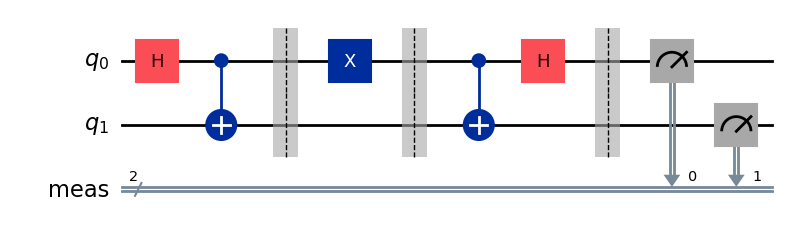

In [5]:
qc = QuantumCircuit(2)

# step 1
create_Bell_pair(qc, 0, 1)
qc.barrier()

# step 2
# two classical bits
message = '10'

encode_message(qc, 0, message)
qc.barrier()

# step 3
decode_message(qc, 0, 1)

# measurement on qubits
qc.measure_all()

qc.draw('mpl')


 Total counts are: {'10': 1000}


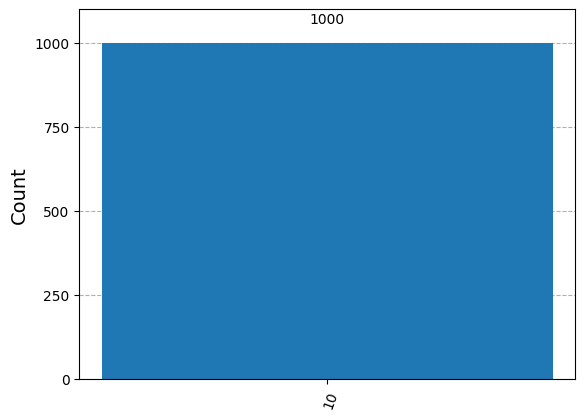

In [6]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(qc, shots = 1000)

# result
counts = job.result().get_counts(qc)

print("\n Total counts are:" , counts)

plot_histogram(counts)


#### Getting 10 as the result of our quantum circuit confirms that the two bits of classical information have been transferred successfully from Alice to Bob.